### Creating a data frame

creating dataframe from 
1. dictionary of lists
2. matrix (list of list)
3. tuples

In [15]:
import pandas as pd

#1 create df from dictionary of lists
d = {
    'a': [4, 5, 6],
    'b': [7, 8, 9],
    'c': [10, 11, 12]
}
df = pd.DataFrame(d, index=[1,2,3]) # no need to give columns; if we don't give index, index starts at 0
# df = pd.DataFrame(d) # this is fine with index starting at 0
print("df(dict):",df)

#2 Creating dictionary from matrix (list of list)
matrix = [
    [4,7,10],
    [5,8,11],
    [6,9,12]
]
df2 = pd.DataFrame(matrix, index=[1,2,3], columns=['a', 'b', 'c']) # if we don't give column;columnName starts at 0
print("df2: ", df2)


# 3. Creating dataframe from tuple with multiIndex
# tp = 
df3 = pd.DataFrame(d, index = pd.MultiIndex.from_tuples([('d', 1), ('d', 2), ('e', 2)], names=['n', 'v']))
# print("index = ", index)
print("\ndf3:\n", df3)


# From dictionary of tuples.
d = {
    'a': (4, 5, 6),
    'b': (7, 8, 9),
    'c': (10, 11, 12)
}
df_tp = pd.DataFrame(d)
print("df_tp=>", df_tp)


df(dict):    a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
df2:     a  b   c
1  4  7  10
2  5  8  11
3  6  9  12

df3:
      a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12
df_tp=>    a  b   c
0  4  7  10
1  5  8  11
2  6  9  12


### Reshaping Data

Changing 
1. Layout (rows into columns(pivot) or columns into rows(melt))
2. Concatination
3. sorting
4. reindexing
5. renaming 
6. dropping columns

In [56]:
# Changing columns into rows(melt)
print("pd.melt(df)=>\n",pd.melt(df))
print(df)

# Spreading rows into columns ; note here we use df not pd
print("df.pivot(columns='var', values='val')=>\n", df.pivot(columns='a', values='c'))

df4 = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

print("df4=>\n",df4)
print("\n\ndf4.pivot(index='foo', columns='bar', values='baz')=>\n",df4.pivot(index='foo', columns='bar', values='baz'))
# for selecting multiple values
print("\n\ndf4.pivot(index='foo', columns='bar', values=['baz', 'zoo'])=>\n",df4.pivot(index='foo', columns='bar', values=['baz', 'zoo']))


# Concatinate
df1 = df2 = df # both have same df for now
print("pd.concat([df1, df2])=>\n",pd.concat([df1, df2])) # by default is append row-wise
print("pd.concat([df1, df2], axis=1)=>\n",pd.concat([df1, df2], axis=1)) # append column-wise

# sorting 
print("df.sort_values(\"a\")=>\n", df.sort_values("a")) # sort values in ascending based on column a
print("df.sort_values(\"a\", ascending=False)=>\n", df.sort_values("a", ascending=False)) # sort values in descending based on column a


# Renaming column ; change column name to another name
print("df.rename(columns={\'a\': \'apple\'})=>\n", df.rename(columns={'a': 'apple'})) # change column a to apple
print(df) # this does not change the original df 


# sorting index and resetting index
print("df.sort_index()=>\n", df.sort_index()) # sorts the index of a dataframe
print("df.reset_index()=>\n",df.reset_index()) # reset the index of df to row numbers, moving index to columns
# above df.reset_index() starts the index from 0


# Droping a cloumn
print(df.drop(columns=['a','b'])) # drops column a and column b; this operation does not change df 
print(df) # df is same as original.



pd.melt(df)=>
   variable  value
0        a      4
1        a      5
2        a      6
3        b      7
4        b      8
5        b      9
6        c     10
7        c     11
8        c     12
   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
df.pivot(columns='var', values='val')=>
 a     4     5     6
1  10.0   NaN   NaN
2   NaN  11.0   NaN
3   NaN   NaN  12.0
df4=>
    foo bar  baz zoo
0  one   A    1   x
1  one   B    2   y
2  one   C    3   z
3  two   A    4   q
4  two   B    5   w
5  two   C    6   t


df4.pivot(index='foo', columns='bar', values='baz')=>
 bar  A  B  C
foo         
one  1  2  3
two  4  5  6


df4.pivot(index='foo', columns='bar', values=['baz', 'zoo'])=>
     baz       zoo      
bar   A  B  C   A  B  C
foo                    
one   1  2  3   x  y  z
two   4  5  6   q  w  t
pd.concat([df1, df2])=>
    a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
1  4  7  10
2  5  8  11
3  6  9  12
pd.concat([df1, df2], axis=1)=>
    a  b   c  a  b   c
1  4  7  10  4  7  10
2  5  8 

### Subset Observations

1. Subset observation in rows
2. subset observation in columns
4. subset observation both: rows and colums

In [84]:
# Subset observations in rows

# select rows with criteria
print("df[df.a>5]=>\n",df[df.a >= 5])  # extract rows that mets logical criteria i.e a with value >= 5.

# drop duplicates
print("df.drop_duplicates()=>\n", df.drop_duplicates()) # remove duplicate rows only consider columns

# get samples
print("df.sample(frac=0.5)=>\n", df.sample(frac=0.5)) # randomly select fraction of rows; this one changes=>random
print("df.sample(n=10)=>\n", df.sample(n=2)) # randomly select n rows. n=10 throws error need to be less than size

# df.nlargest(n, 'values') => select and orgder top n entries
print("df.nlargest(2, 'a')=>\n", df.nlargest(2, 'a')) # orders in descending order
# df.nsmallest(n, 'values') => select and orders bottom n entries
print("df.nsmallest(2, 'a')=>\n", df.nsmallest(2, 'a')) # oders in ascending order

print("df.head(5)=>\n",df.head(5)) # selects first n rows
print("df.tail(5)=>\n", df.tail(5)) # selects last n rows

df[df.a>5]=>
    a  b   c
2  5  8  11
3  6  9  12
df.drop_duplicates()=>
    a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
df.sample(frac=0.5)=>
    a  b   c
3  6  9  12
2  5  8  11
df.sample(n=10)=>
    a  b   c
2  5  8  11
3  6  9  12
df.nlargest(2, 'a')=>
    a  b   c
3  6  9  12
2  5  8  11
df.nsmallest(2, 'a')=>
    a  b   c
1  4  7  10
2  5  8  11
df.head(5)=>
    a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
df.tail(5)=>
    a  b   c
1  4  7  10
2  5  8  11
3  6  9  12


In [89]:
# Subset observation in columns

# selecting multiple columns with names
print("df[['a','b']]=>\n", df[['a','b']]) # select column a and column b

# selecting single column
print("df['a']=>\n", df['a']) 
print("df.a=>\n", df.a)

# select columns whose name matches regular expression
df.filter(regex='regex')

df[['a','b']]=>
    a  b
1  4  7
2  5  8
3  6  9
df['a']=>
 1    4
2    5
3    6
Name: a, dtype: int64
df.a=>
 1    4
2    5
3    6
Name: a, dtype: int64


""
1
2
3


In [105]:
# Subset observation with both rows and columns

# Using df.loc[] and df.iloc to select only rows , only columns or both.
# df.iloc = integer location= gets value based on index value (index can be in random order)
# df.loc = location = gets value based on position i.e. from row values starting with 0.

# using df.at[] and df.iat[] to select single values by row and columns.
# iat=integer at = Access a single value for a row/column pair by integer position

# df.loc[select_rows , select_columns]
print("df.iloc[1:2]=>\n", df.iloc[1:3]) # select rows from 1 to 3 (excluding 3 i.e. 2 values)
print("df.iloc[:, [1,2]]=>\n",df.iloc[:, [1,2]]) # select column in 1 and 2 position


print("df.loc[:, 'a':'b']=>\n", df.loc[:, 'a':'b']) # select column from 'a' index to 'b' index('b' inclusive)
print("df.loc[df['a']>5, ['a','c']]=>\n", df.loc[df['a']>5, ['a','c']]) # select the column meeting the logical condition and only columns specified


print("df.iat[1,2]=>\n", df.iat[1,2]) # access single value by index
print("df.at[2, 'a']=>\n", df.at[2, 'a']) # access single value by label

df.iloc[1:2]=>
    a  b   c
2  5  8  11
3  6  9  12
df.iloc[:, [1,2]]=>
    b   c
1  7  10
2  8  11
3  9  12
df.loc[:, 'a':'b']=>
    a  b
1  4  7
2  5  8
3  6  9
df.loc[df['a']>5, ['a','c']]=>
    a   c
3  6  12
df.iat[1,2]=>
 11
df.at[2, 'a']=>
 5


### Summarize data

value_counts(), shape, nunique(), describe()
1. df['w'].value_counts() => counts number of rows with each unique value of variable
2. len(df) => number of rows in df
3. df['w'].nunique() => no. of distinct value in a column
4. df.describe() => basic description and statistics for each column (or groupby)


Summarization functions: 
sum(), min(), max(), median(), count(), var(), std(), apply(function), quartile([0.25, 0.75])

------------------------------




In [123]:
df1 = pd.concat([df, df])
print("df1.value_counts()=>\n", df1.value_counts()) # gives unique values with count
print("len(df1)=>",len(df1)) # length of dataframe
print("df1.shape=>", df1.shape) # tuple of number of rows and no. of columns((rows, column))
print("df1['a'].nunique()=>", df1['a'].nunique()) # no. of distinct values in a column
print(df1.a.nunique()) # same as above no. of distinct value with df1.a
print("df1.describe()=>\n", df1.describe())

df1.value_counts()=>
 a  b  c 
4  7  10    2
5  8  11    2
6  9  12    2
dtype: int64
len(df1)=> 6
df1.shape=> (6, 3)
df1['a'].nunique()=> 3
3
df1.describe()=>
               a         b          c
count  6.000000  6.000000   6.000000
mean   5.000000  8.000000  11.000000
std    0.894427  0.894427   0.894427
min    4.000000  7.000000  10.000000
25%    4.250000  7.250000  10.250000
50%    5.000000  8.000000  11.000000
75%    5.750000  8.750000  11.750000
max    6.000000  9.000000  12.000000


In [144]:
# Sum = sum of the values of each object
print("df['a'].sum()=>", df['a'].sum())
print("df.sum()=>\n", df.sum())

# min() - minimum value in each object
print("df.min()=>\n", df.min())

# max() - maximum value in each object
print("df.max()=>\n", df.max())

print("df.mean()=>\n", df.mean()) # mean value in each object in a column

print("df.median()=>\n", df.median()) # median value of each object in a column

print("df.var()=>\n ", df.var()) # variance of each object in a column

print("df.std()=> \n", df.std())# standard deviation of each object in a column

print("df.quantile([0.25, 0.75])=>\n", df.quantile([0.25, 0.75])) # quantiles of each object

print("df.median()=>\n", df.median()) # median value of each object in column

df['a'].sum()=> 15
df.sum()=>
 a    15
b    24
c    33
dtype: int64
df.min()=>
 a     4
b     7
c    10
dtype: int64
df.max()=>
 a     6
b     9
c    12
dtype: int64
df.mean()=>
 a     5.0
b     8.0
c    11.0
dtype: float64
df.median()=>
 a     5.0
b     8.0
c    11.0
dtype: float64
df.var()=>
  a    1.0
b    1.0
c    1.0
dtype: float64
df.std()=> 
 a    1.0
b    1.0
c    1.0
dtype: float64
df.quantile([0.25, 0.75])=>
         a    b     c
0.25  4.5  7.5  10.5
0.75  5.5  8.5  11.5
df.median()=>
 a     5.0
b     8.0
c    11.0
dtype: float64


### Group Data

using df.groupby() to group data. 

In [178]:
print(df1)

# below returns a groupby object, grouped by values in column named 'a'
print(df1.groupby(by='a')) # this returns groupby object 

# we need summarization function to show grouped results. E.g.
print("df1.groupby(by='a').sum()=>\n", df1.groupby(by='a').sum()) # get sum after group by
print("df1.groupby(by='a').mean()=>\n", df1.groupby(by='a').mean ()) # get mean after group by


# how to get only 'b' column value ; use ...['colname'] filter
print("df1.groupby(by='a').mean ()['b']=>\n", df1.groupby(by='a').mean ()['b'])


# All the summarization function can be add to the groupby clause. Also we have
# 1. size() => sie of each group
# 2. agg(function) => aggregate group using function

print("df1.groupby('a').size()=>\n", df1.groupby('a').size())

print(df1.groupby('a').agg('min')) # summarization function
print(df1.groupby('a').agg(['max', 'median']))


# using custom function in groupby 
def func(val):
    """val is a series of data"""
    if val.mean() > 8:
        return val.mean()
    else:
        return 0

print("df1.groupby('a').agg(func)=>\n", df1.groupby('a').agg(func)) # similar to as ... .agg('min') but with else


df33 = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]},
                   index=[1,2,3, 4])
df33.index.name='ind'
# group by values in index level named 'ind'
print(df33.groupby(level='ind').min())

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
1  4  7  10
2  5  8  11
3  6  9  12
df1.groupby(by='a').sum()=>
     b   c
a        
4  14  20
5  16  22
6  18  24
df1.groupby(by='a').mean()=>
      b     c
a           
4  7.0  10.0
5  8.0  11.0
6  9.0  12.0
df1.groupby(by='a').mean ()['b']=>
 a
4    7.0
5    8.0
6    9.0
Name: b, dtype: float64
df1.groupby('a').size()=>
 a
4    2
5    2
6    2
dtype: int64
   b   c
a       
4  7  10
5  8  11
6  9  12
    b          c       
  max median max median
a                      
4   7    7.0  10   10.0
5   8    8.0  11   11.0
6   9    9.0  12   12.0
df1.groupby('a').agg(func)=>
      b     c
a           
4  0.0  10.0
5  0.0  11.0
6  9.0  12.0
     Animal  Max Speed
ind                   
1    Falcon      380.0
2    Falcon      370.0
3    Parrot       24.0
4    Parrot       26.0


### Windows function
df.expanding() => return an expanding objet allowing summary functions to be applied cumulatively. 

df.rolling(n) => return a rolling object allowing summary functions to be applied to windows of length n

In [181]:
print(df1)
df1.rolling(2).mean() # get mean of rollowing window 2

   a  b   c
1  4  7  10
2  5  8  11
3  6  9  12
1  4  7  10
2  5  8  11
3  6  9  12


,a,b,c
1,NaN,NaN,NaN
2,4.5,7.5,10.5
3,5.5,8.5,11.5
1,5.0,8.0,11.0
2,4.5,7.5,10.5
3,5.5,8.5,11.5


### Handling missing data
using df.dropna() and df.fillna() 

In [183]:
df1.dropna() # drops rows with any column having NA/null value/data.
# df1.fillna(value) # replace all NA/null data with value
df1.fillna(0) # here it means fill with 0

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12
1,4,7,10
2,5,8,11
3,6,9,12


### Making new columns
df.assign(columnname=lambda df:df.a *df.b) # assign columnname column with multiple of a and b column

similarly,
df['columnname']=df.a * df.b  # add a single column

pd.qcut(df.col, n, labels=False) => bin columns into n buckets

max(axis=1) => element wise maximum
min(axix=1) => element wise minimum

clip(lower=-10, upper =10) # trim values at input threshold
abs() => absolute value

In [188]:
print(df1)

df1['max_value'] = df1.max(axis=1)
print(df1) # print the df1 now with max values as well.


# this clips values ; if value is less then 5 it will be 5 and more than 7 it will be 7 and inbetween then as it is
print("df1.clip(lower=5, upper=7)=>\n", df1.clip(lower=5, upper=7))


   a  b   c  max_value
1  4  7  10         10
2  5  8  11         11
3  6  9  12         12
1  4  7  10         10
2  5  8  11         11
3  6  9  12         12
   a  b   c  max_value
1  4  7  10         10
2  5  8  11         11
3  6  9  12         12
1  4  7  10         10
2  5  8  11         11
3  6  9  12         12
df1.clip(lower=5, upper=7)=>
    a  b  c  max_value
1  5  7  7          7
2  5  7  7          7
3  6  7  7          7
1  5  7  7          7
2  5  7  7          7
3  6  7  7          7


###  Plotting
df.plot.hist() => histogram for each column

df.plot.scatter(x='a', y='b') => scatter plot using points from a and b column

<Axes: ylabel='Frequency'>

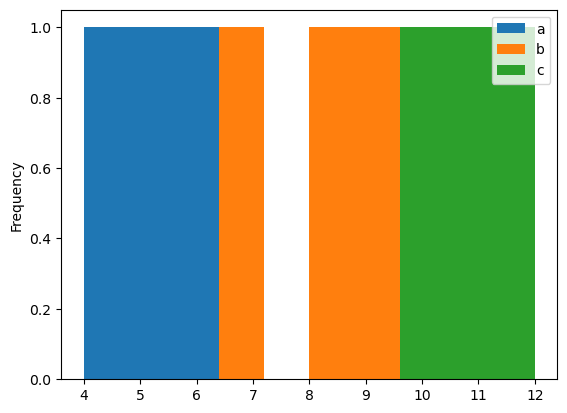

In [189]:
df.plot.hist() 

<Axes: xlabel='a', ylabel='b'>

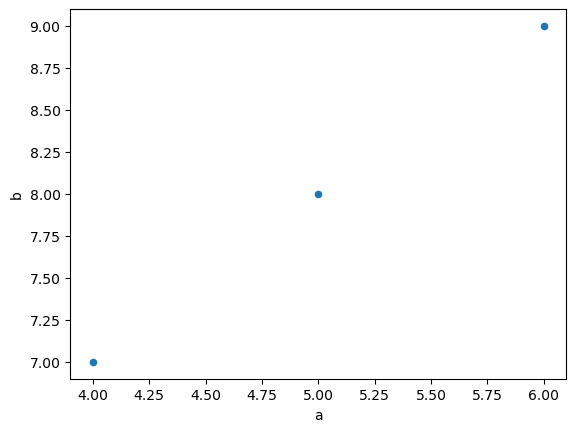

In [192]:
df.plot.scatter(x='a', y='b')

## Combining datset (using joins)

pd.merge(df1, df2, how='left/right/inner/outer', on='colname') => merge two dataframe on colname using how condition.

In [196]:
adf = pd.DataFrame({
    'x1':['A', 'B', 'C'],
    'x2': [1,2,3]})
print(adf)

bdf = pd.DataFrame({
    'x1':['A', 'B', 'D'],
    'x3': ['T','F','T']})
print(bdf)

  x1  x2
0  A   1
1  B   2
2  C   3
  x1 x3
0  A  T
1  B  F
2  D  T


In [200]:
pd.merge(adf, bdf, how='left', on='x1') # using left join

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [201]:
pd.merge(adf, bdf, how='right', on='x1') # right join

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [202]:
pd.merge(adf, bdf, how='inner', on='x1') # inner join

,x1,x2,x3
0,A,1,T
1,B,2,F


In [203]:
pd.merge(adf, bdf, how='outer', on='x1') # outer join

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [204]:
# filtering joins

# filter all rows in adf that has match in bdf
adf[adf.x1.isin(bdf.x1)]

,x1,x2
0,A,1
1,B,2


In [205]:
# all the columns in adf that is not a match in bdf
adf[~adf.x1.isin(bdf.x1)]

,x1,x2
2,C,3


### Using query
df.query(condition) => query allows boolean expression for filtering rows.

In [208]:
df.query('a>5')

,a,b,c
3,6,9,12


In [209]:
df.query('a>1 and b <9')

,a,b,c
1,4,7,10
2,5,8,11
